--- Decision Tree ---
Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       0.90      0.97      0.94        37
           2       0.97      0.89      0.93        37

    accuracy                           0.95       105
   macro avg       0.96      0.95      0.95       105
weighted avg       0.95      0.95      0.95       105


Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

--------------------
--- Random Forest ---
Training Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00  

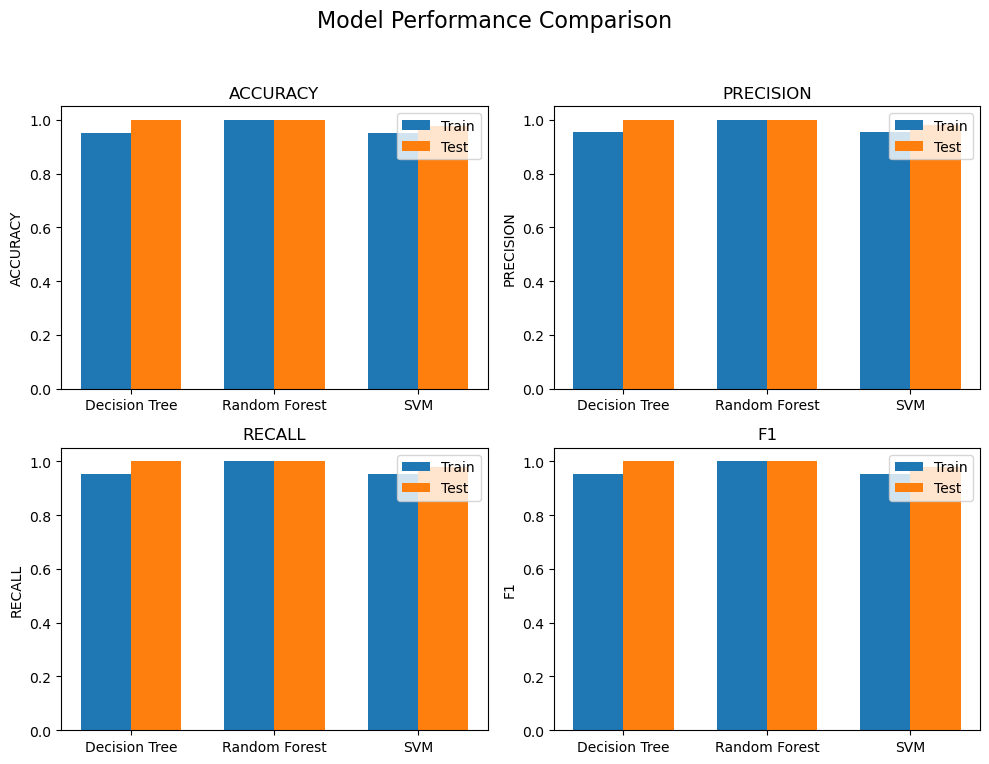

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# Load the dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define models and hyperparameter grids
models = {
    'Decision Tree': (DecisionTreeClassifier(random_state=42), {'max_depth': [2, 3, 4, 5, None]}),
    'Random Forest': (RandomForestClassifier(random_state=42), {'n_estimators': [10, 50, 100, 200], 'max_depth': [3, 5, None]}),
    'SVM': (Pipeline([('scaler', StandardScaler()), ('svm', SVC(random_state=42))]),
            {'svm__kernel': ['linear', 'rbf'], 'svm__C': np.logspace(-2, 1, 5), 'svm__gamma': ['scale', 'auto']})
}

# Function to train, evaluate, and print results
def evaluate_model(model, params, X_train, y_train, X_test, y_test):
    grid_search = RandomizedSearchCV(model, params, cv=5, scoring='accuracy', n_iter=5, random_state=42)
    grid_search.fit(X_train, y_train)
    best_model = grid_search.best_estimator_

    y_train_pred = best_model.predict(X_train)
    y_test_pred = best_model.predict(X_test)

    print("Training Set:")
    print(classification_report(y_train, y_train_pred))

    print("\nTest Set:")
    print(classification_report(y_test, y_test_pred))
    print("-" * 20)

    train_metrics = calculate_metrics(y_train, y_train_pred)
    test_metrics = calculate_metrics(y_test, y_test_pred)
    return train_metrics, test_metrics


# Function to calculate and return metrics (this is still needed for visualization)
def calculate_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1


# Train and evaluate each model, storing results
results = {}
for name, (model, params) in models.items():
    print(f"--- {name} ---")
    train_metrics, test_metrics = evaluate_model(model, params, X_train, y_train, X_test, y_test)
    results[name] = {'train': train_metrics, 'test': test_metrics}


# Visualization
metrics = ['accuracy', 'precision', 'recall', 'f1']
width = 0.35

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
fig.suptitle('Model Performance Comparison', fontsize=16)

for i, metric in enumerate(metrics):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    train_scores = [results[model]['train'][i] for model in results]
    test_scores = [results[model]['test'][i] for model in results]
    x = np.arange(len(results))

    ax.bar(x - width/2, train_scores, width, label='Train')
    ax.bar(x + width/2, test_scores, width, label='Test')
    ax.set_xticks(x)
    ax.set_xticklabels(results.keys())
    ax.set_ylabel(metric.upper())
    ax.legend()
    ax.set_title(metric.upper())

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

##### The Decision Tree and Random Forest models exhibited perfect performance on the test set, achieving 100% accuracy. However, the Random Forest model achieved perfect accuracy on the training set as well, suggesting it may be slightly overfit. The Decision Tree model showed some underfitting on the training set (95% accuracy), indicating it might not have captured all the underlying patterns in the data. The SVM model showed similar training set performance to the Decision Tree, but its test set accuracy (98%) was slightly lower than the other two, suggesting a potential for generalization issues compared to the other two algorithms. In summary, while all three models performed well, the Random Forest model shows the most promising results, though the possibility of overfitting warrants further investigation with a larger dataset.